In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [312]:
df = pd.read_csv('laptopData.csv')

In [313]:
print(df.isnull().sum())


Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


In [314]:
# for col in df.select_dtypes(include=['float64', 'int64']).columns:
#     df[col].fillna(df[col].mean(), inplace=True)


C:\Users\71538\AppData\Local\Temp\ipykernel_20668\603422227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [315]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [316]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
df_train

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1158,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,1.0TB Hybrid,AMD Radeon R5 M330,Windows 10,2.5kg,42010.7472
904,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,104588.1072
439,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Linux,2kg,29783.5200
581,Dell,Notebook,15.6,1366x768,Intel Core i5 7300U 2.6GHz,8GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.9kg,53733.9456
676,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.1kg,60472.8000
...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.4kg,42570.7200
1130,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,2TB HDD,Intel HD Graphics 620,Windows 10,2.04kg,33513.1200
1294,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
860,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,45323.1648


In [317]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [318]:
print(df.isnull().sum())


Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [319]:
def extract_screen_resolution(res):
    parts = res.split()
    screen_type = ' '.join(parts[:-1])  # Assumes the format is like "IPS Panel 1920x1080"
    resolution = parts[-1]
    return screen_type, resolution

In [320]:
screen_resolution_df = df['ScreenResolution'].apply(lambda x: pd.Series(extract_screen_resolution(x)))
screen_resolution_df.columns = ['ScreenType', 'Resolution']

In [321]:
df = pd.concat([df, screen_resolution_df], axis=1)


In [322]:
df.drop('ScreenResolution', axis=1, inplace=True)


In [323]:
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenType,Resolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,,1440x900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Full HD,1920x1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,IPS Panel Retina Display,2880x1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,IPS Panel Retina Display,2560x1600
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,IPS Panel Full HD / Touchscreen,1920x1080
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,IPS Panel Quad HD+ / Touchscreen,3200x1800
1300,Lenovo,Notebook,14,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,,1366x768
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,,1366x768


In [324]:
def extract_cpu(cpu):
    parts = cpu.split()
    company_generation = ' '.join(parts[:3])  # Assumes the format is like "Intel Core i5 ..."
    hz = parts[-1].replace('GHz', '').strip()
    return company_generation, float(hz)

In [325]:
cpu_df = df['Cpu'].apply(lambda x: pd.Series(extract_cpu(x)))
cpu_df.columns = ['CpuCompanyGeneration', 'CpuHz']

In [326]:
df = pd.concat([df, cpu_df], axis=1)


In [327]:
df.drop('Cpu', axis=1, inplace=True)


In [328]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenType,Resolution,CpuCompanyGeneration,CpuHz
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,,1440x900,Intel Core i5,1.8
2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Full HD,1920x1080,Intel Core i5,2.5
3,Apple,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,IPS Panel Retina Display,2880x1800,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,IPS Panel Retina Display,2560x1600,Intel Core i5,3.1


In [329]:
def extract_gpu(gpu):
    parts = gpu.split()
    gpu_brand_model = ' '.join(parts[:-1])  # Assumes the format is like "Intel Iris Plus Graphics 640"
    gpu_size = parts[-1]
    return gpu_brand_model, gpu_size

In [330]:
gpu_df = df['Gpu'].apply(lambda x: pd.Series(extract_gpu(x)))
gpu_df.columns = ['GpuBrandModel', 'GpuSize']

In [331]:
df = pd.concat([df, gpu_df], axis=1)


In [332]:
df.drop('Gpu', axis=1, inplace=True)


In [333]:
df.head()

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,ScreenType,Resolution,CpuCompanyGeneration,CpuHz,GpuBrandModel,GpuSize
0,Apple,Ultrabook,13.3,8GB,128GB SSD,macOS,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600,Intel Core i5,2.3,Intel Iris Plus Graphics,640
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,macOS,1.34kg,47895.5232,,1440x900,Intel Core i5,1.8,Intel HD Graphics,6000
2,HP,Notebook,15.6,8GB,256GB SSD,No OS,1.86kg,30636.0000,Full HD,1920x1080,Intel Core i5,2.5,Intel HD Graphics,620
3,Apple,Ultrabook,15.4,16GB,512GB SSD,macOS,1.83kg,135195.3360,IPS Panel Retina Display,2880x1800,Intel Core i7,2.7,AMD Radeon Pro,455
4,Apple,Ultrabook,13.3,8GB,256GB SSD,macOS,1.37kg,96095.8080,IPS Panel Retina Display,2560x1600,Intel Core i5,3.1,Intel Iris Plus Graphics,650


In [334]:
import re

def split_memory(mem):
    size = None
    unit = None
    mem_type = None
    
    # Find the numeric part and convert to float
    size_match = re.search(r'\d+(\.\d+)?', mem)
    if size_match:
        size = float(size_match.group())

    # Find the unit (GB or TB)
    if 'TB' in mem:
        unit = 'TB'
    elif 'GB' in mem:
        unit = 'GB'
    
    # Find the memory type (SSD, HDD, Hybrid)
    if 'SSD' in mem:
        mem_type = 'SSD'
    elif 'HDD' in mem:
        mem_type = 'HDD'
    elif 'Hybrid' in mem:
        mem_type = 'Hybrid'
    else:
        mem_type = 'Unknown'

    return size, unit, mem_type

In [335]:
memory_df = df['Memory'].apply(lambda x: pd.Series(split_memory(x)))
memory_df.columns = ['MemorySize', 'MemoryUnit', 'MemoryType']

In [336]:
df = pd.concat([df, memory_df], axis=1)


In [337]:
df.drop('Memory', axis=1, inplace=True)


In [338]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,ScreenType,Resolution,CpuCompanyGeneration,CpuHz,GpuBrandModel,GpuSize,MemorySize,MemoryUnit,MemoryType
0,Apple,Ultrabook,13.3,8GB,macOS,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600,Intel Core i5,2.3,Intel Iris Plus Graphics,640,128.0,GB,SSD
1,Apple,Ultrabook,13.3,8GB,macOS,1.34kg,47895.5232,,1440x900,Intel Core i5,1.8,Intel HD Graphics,6000,128.0,GB,Unknown
2,HP,Notebook,15.6,8GB,No OS,1.86kg,30636.0000,Full HD,1920x1080,Intel Core i5,2.5,Intel HD Graphics,620,256.0,GB,SSD
3,Apple,Ultrabook,15.4,16GB,macOS,1.83kg,135195.3360,IPS Panel Retina Display,2880x1800,Intel Core i7,2.7,AMD Radeon Pro,455,512.0,GB,SSD
4,Apple,Ultrabook,13.3,8GB,macOS,1.37kg,96095.8080,IPS Panel Retina Display,2560x1600,Intel Core i5,3.1,Intel Iris Plus Graphics,650,256.0,GB,SSD


In [339]:
def split_weight(weight):
    size_match = re.search(r'\d+(\.\d+)?', weight)
    size = float(size_match.group()) if size_match else None
    unit = weight.replace(size_match.group(), '').strip() if size_match else None
    return size, unit


In [340]:
weight_df = df['Weight'].apply(lambda x: pd.Series(split_weight(x)))
weight_df.columns = ['WeightValue', 'WeightUnit']

In [341]:
df = pd.concat([df, weight_df], axis=1)


In [342]:
df.drop('Weight', axis=1, inplace=True)


In [343]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Price,ScreenType,Resolution,CpuCompanyGeneration,CpuHz,GpuBrandModel,GpuSize,MemorySize,MemoryUnit,MemoryType,WeightValue,WeightUnit
0,Apple,Ultrabook,13.3,8GB,macOS,71378.6832,IPS Panel Retina Display,2560x1600,Intel Core i5,2.3,Intel Iris Plus Graphics,640,128.0,GB,SSD,1.37,kg
1,Apple,Ultrabook,13.3,8GB,macOS,47895.5232,,1440x900,Intel Core i5,1.8,Intel HD Graphics,6000,128.0,GB,Unknown,1.34,kg
2,HP,Notebook,15.6,8GB,No OS,30636.0000,Full HD,1920x1080,Intel Core i5,2.5,Intel HD Graphics,620,256.0,GB,SSD,1.86,kg
3,Apple,Ultrabook,15.4,16GB,macOS,135195.3360,IPS Panel Retina Display,2880x1800,Intel Core i7,2.7,AMD Radeon Pro,455,512.0,GB,SSD,1.83,kg
4,Apple,Ultrabook,13.3,8GB,macOS,96095.8080,IPS Panel Retina Display,2560x1600,Intel Core i5,3.1,Intel Iris Plus Graphics,650,256.0,GB,SSD,1.37,kg


In [344]:
def split_ram(ram):
    size_match = re.search(r'\d+(\.\d+)?', ram)
    size = float(size_match.group()) if size_match else None
    unit = ram.replace(size_match.group(), '').strip() if size_match else None
    return size, unit

In [345]:
ram_df = df['Ram'].apply(lambda x: pd.Series(split_ram(x)))
ram_df.columns = ['RamSize', 'RamUnit']

In [346]:
df = pd.concat([df, ram_df], axis=1)


In [347]:
df.drop('Ram', axis=1, inplace=True)


In [348]:
df.head()

,Company,TypeName,Inches,OpSys,Price,ScreenType,Resolution,CpuCompanyGeneration,CpuHz,GpuBrandModel,GpuSize,MemorySize,MemoryUnit,MemoryType,WeightValue,WeightUnit,RamSize,RamUnit
0,Apple,Ultrabook,13.3,macOS,71378.6832,IPS Panel Retina Display,2560x1600,Intel Core i5,2.3,Intel Iris Plus Graphics,640,128.0,GB,SSD,1.37,kg,8.0,GB
1,Apple,Ultrabook,13.3,macOS,47895.5232,,1440x900,Intel Core i5,1.8,Intel HD Graphics,6000,128.0,GB,Unknown,1.34,kg,8.0,GB
2,HP,Notebook,15.6,No OS,30636.0000,Full HD,1920x1080,Intel Core i5,2.5,Intel HD Graphics,620,256.0,GB,SSD,1.86,kg,8.0,GB
3,Apple,Ultrabook,15.4,macOS,135195.3360,IPS Panel Retina Display,2880x1800,Intel Core i7,2.7,AMD Radeon Pro,455,512.0,GB,SSD,1.83,kg,16.0,GB
4,Apple,Ultrabook,13.3,macOS,96095.8080,IPS Panel Retina Display,2560x1600,Intel Core i5,3.1,Intel Iris Plus Graphics,650,256.0,GB,SSD,1.37,kg,8.0,GB


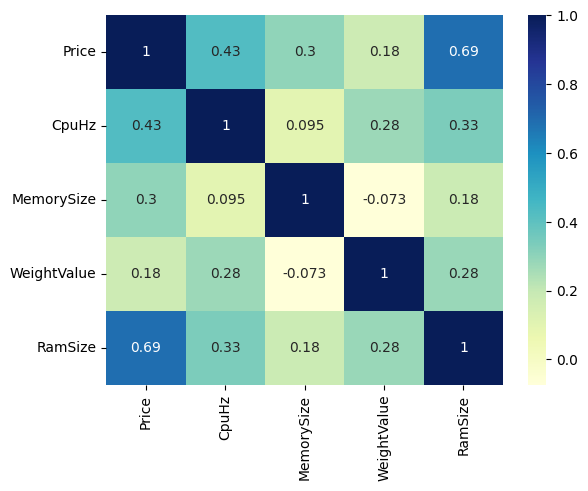

<Figure size 10000x8000 with 0 Axes>

In [349]:
corr = df.select_dtypes(include=np.number).corr()
dataplot = sb.heatmap(corr, annot=True, cmap="YlGnBu")
plt.figure(figsize=(100,80))
plt.show()

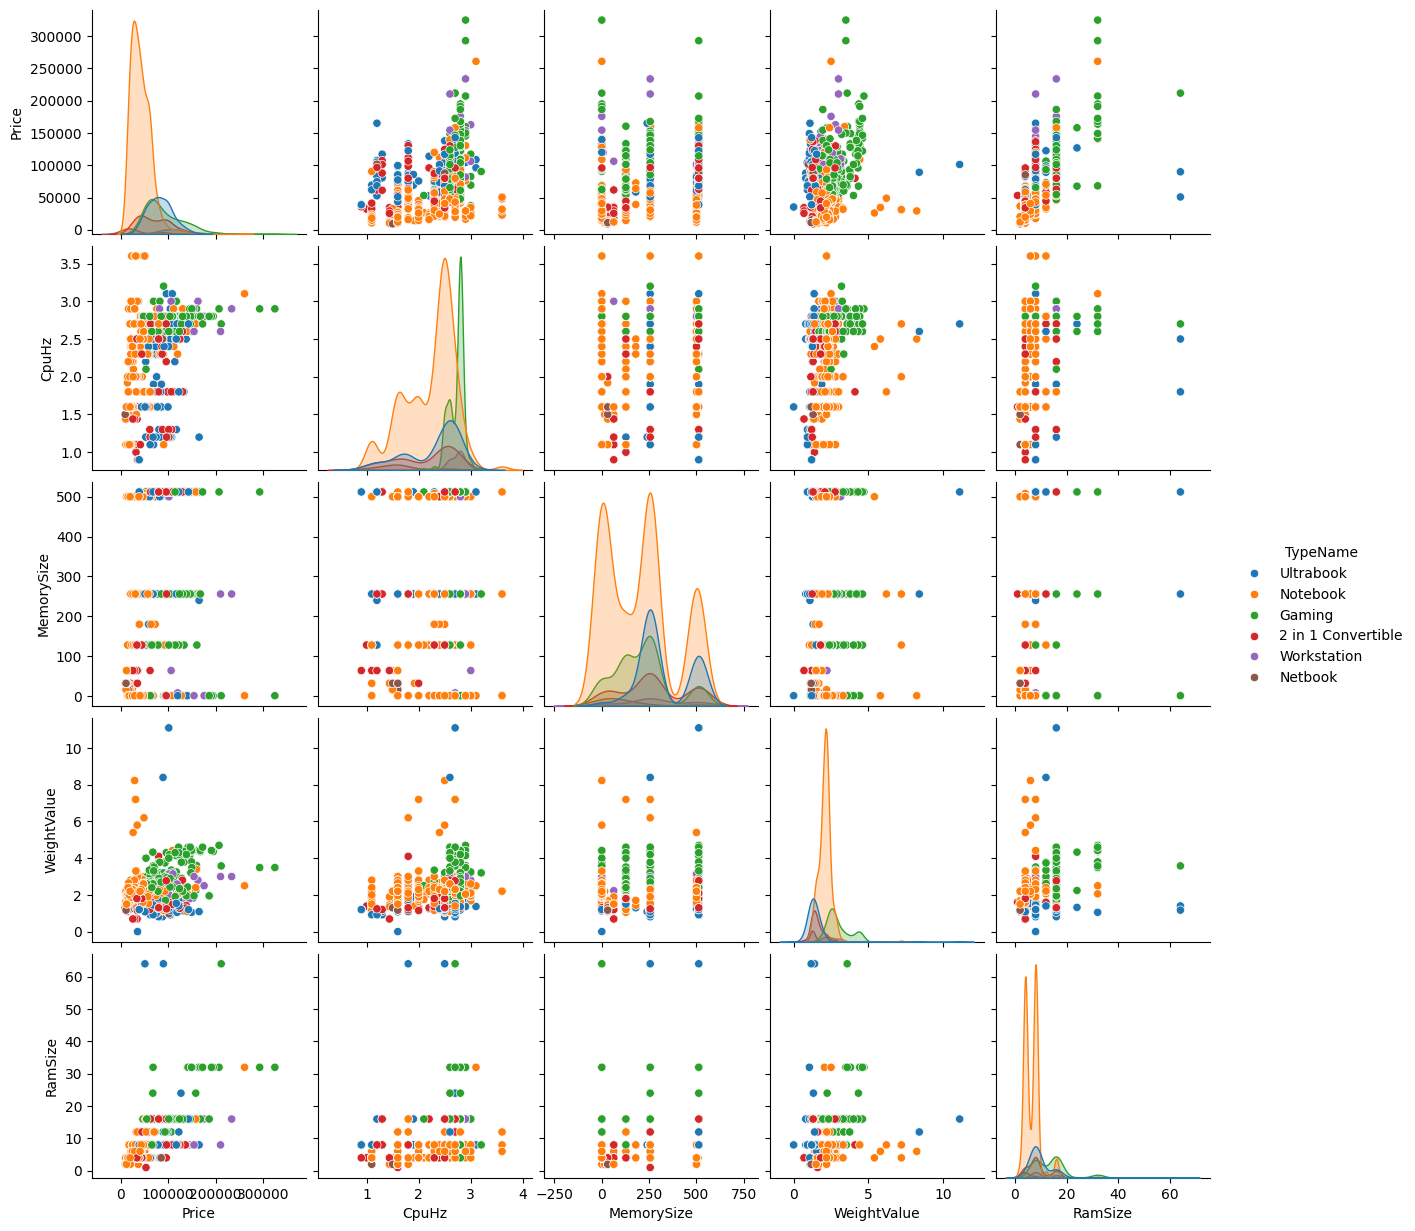

In [350]:
sb.pairplot(df, hue="TypeName")
plt.show()

In [351]:
categorical = df.select_dtypes(exclude = np.number).columns
categorical

Index(['Company', 'TypeName', 'Inches', 'OpSys', 'ScreenType', 'Resolution',
       'CpuCompanyGeneration', 'GpuBrandModel', 'GpuSize', 'MemoryUnit',
       'MemoryType', 'WeightUnit', 'RamUnit'],
      dtype='object')

In [352]:
df1 = df.copy()
classes = dict()
le = LabelEncoder()
for col in categorical:
    df1[col]= le.fit_transform(df1[col])
    classes[col] = le.classes_

In [353]:
df1.head()

,Company,TypeName,Inches,OpSys,Price,ScreenType,Resolution,CpuCompanyGeneration,CpuHz,GpuBrandModel,GpuSize,MemorySize,MemoryUnit,MemoryType,WeightValue,WeightUnit,RamSize,RamUnit
0,1,4,7,8,71378.6832,12,10,33,2.3,16,29,128.0,0,2,1.37,0,8.0,0
1,1,4,7,8,47895.5232,0,1,33,1.8,14,25,128.0,0,3,1.34,0,8.0,0
2,7,3,14,4,30636.0000,3,3,33,2.5,14,27,256.0,0,2,1.86,0,8.0,0
3,1,4,13,8,135195.3360,12,12,34,2.7,4,12,512.0,0,2,1.83,0,16.0,0
4,1,4,7,8,96095.8080,12,10,33,3.1,16,30,256.0,0,2,1.37,0,8.0,0


In [354]:
df1[df1.isnull().any(axis=1)]
df1 = df1.dropna()

In [355]:
X = df1.drop(columns = 'Price').values
X

array([[ 1.,  4.,  7., ...,  0.,  8.,  0.],
       [ 1.,  4.,  7., ...,  0.,  8.,  0.],
       [ 7.,  3., 14., ...,  0.,  8.,  0.],
       ...,
       [10.,  3., 10., ...,  0.,  2.,  0.],
       [ 7.,  3., 14., ...,  0.,  6.,  0.],
       [ 2.,  3., 14., ...,  0.,  4.,  0.]])

In [356]:
y = df1['Price'].values
y

array([71378.6832, 47895.5232, 30636.    , ..., 12201.12  , 40705.92  ,
       19660.32  ])

In [357]:
df1.isnull().sum()

Company                 0
TypeName                0
Inches                  0
OpSys                   0
Price                   0
ScreenType              0
Resolution              0
CpuCompanyGeneration    0
CpuHz                   0
GpuBrandModel           0
GpuSize                 0
MemorySize              0
MemoryUnit              0
MemoryType              0
WeightValue             0
WeightUnit              0
RamSize                 0
RamUnit                 0
dtype: int64

In [358]:
df1.isnull().sum()

Company                 0
TypeName                0
Inches                  0
OpSys                   0
Price                   0
ScreenType              0
Resolution              0
CpuCompanyGeneration    0
CpuHz                   0
GpuBrandModel           0
GpuSize                 0
MemorySize              0
MemoryUnit              0
MemoryType              0
WeightValue             0
WeightUnit              0
RamSize                 0
RamUnit                 0
dtype: int64

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.shape

(391, 17)

In [360]:
reg = LinearRegression() # ols
reg.fit(X_train, y_train)

LinearRegression()

In [361]:
y_pred = reg.predict(X_test)

In [362]:
y_pred[:10]

array([ 69354.76243206, 157485.98122664,  29459.73848773,  50006.92900854,
        85078.18626649,  63731.65009745, 133941.71575651,  20907.22128309,
        67966.18856965,  17471.43207313])

In [363]:
y_test[:10]

array([ 89084.16      , 194972.832     ,  24988.32      ,  28504.8       ,
       104587.5744    ,  59955.81407321,  95850.72      ,  20193.12      ,
        75289.968     ,  18594.72      ])

In [364]:
np.mean(np.square(y_test - y_pred))

429805987.39893466

In [365]:
np.mean(np.absolute(y_test - y_pred))

14328.016870924335

In [366]:
min(y), max(y)

(9270.72, 324954.72)

In [367]:
y_mean = np.mean(y_test)
TSS = np.sum(np.square(y_test - y_mean))
RSS = np.sum(np.square(y_test - y_pred))
1- RSS/ TSS

0.6980207157555083

In [368]:
np.mean(np.abs(y_pred-y_test))

14328.016870924335

In [369]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)


(0.6980207157555083, 429805987.39893466, 14328.016870924335)

In [370]:
y_bar = np.mean(y_test)
1 - np.sum(np.square(y_pred-y_test))/np.sum(np.square(y_test-y_bar))

0.6980207157555083

In [371]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


In [372]:
df[numeric_cols] = minmax_scale(df[numeric_cols])


In [373]:
label_encoder = LabelEncoder()


In [374]:
df.head()


,Company,TypeName,Inches,OpSys,Price,ScreenType,Resolution,CpuCompanyGeneration,CpuHz,GpuBrandModel,GpuSize,MemorySize,MemoryUnit,MemoryType,WeightValue,WeightUnit,RamSize,RamUnit
0,Apple,Ultrabook,13.3,macOS,0.196741,IPS Panel Retina Display,2560x1600,Intel Core i5,0.518519,Intel Iris Plus Graphics,640,0.248532,GB,SSD,0.123408,kg,0.111111,GB
1,Apple,Ultrabook,13.3,macOS,0.122353,,1440x900,Intel Core i5,0.333333,Intel HD Graphics,6000,0.248532,GB,Unknown,0.120705,kg,0.111111,GB
2,HP,Notebook,15.6,No OS,0.067679,Full HD,1920x1080,Intel Core i5,0.592593,Intel HD Graphics,620,0.499022,GB,SSD,0.167553,kg,0.111111,GB
3,Apple,Ultrabook,15.4,macOS,0.398895,IPS Panel Retina Display,2880x1800,Intel Core i7,0.666667,AMD Radeon Pro,455,1.000000,GB,SSD,0.164850,kg,0.238095,GB
4,Apple,Ultrabook,13.3,macOS,0.275038,IPS Panel Retina Display,2560x1600,Intel Core i5,0.814815,Intel Iris Plus Graphics,650,0.499022,GB,SSD,0.123408,kg,0.111111,GB
